In [8]:
import pandas as pd
import seaborn as sns
import numpy as npl
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
t = pd.read_csv('titanic.csv',index_col=1)

In [34]:
t.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
t.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [33]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 0
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 103.5+ KB


In [7]:
t.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


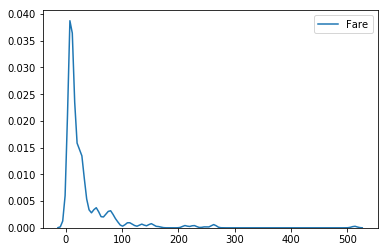

In [58]:
sns.kdeplot(t['Fare'])

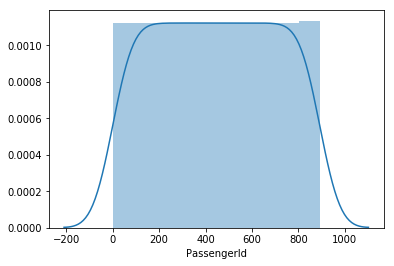

In [48]:
sns.distplot(t['PassengerId'],kde=False)


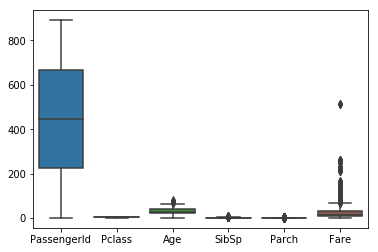

In [10]:
sns.boxplot(data = t)

In [64]:
t['Fare'].unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [65]:
t["Sex"].unique()

array(['male', 'female'], dtype=object)

Text(0.5,1,'Survival')

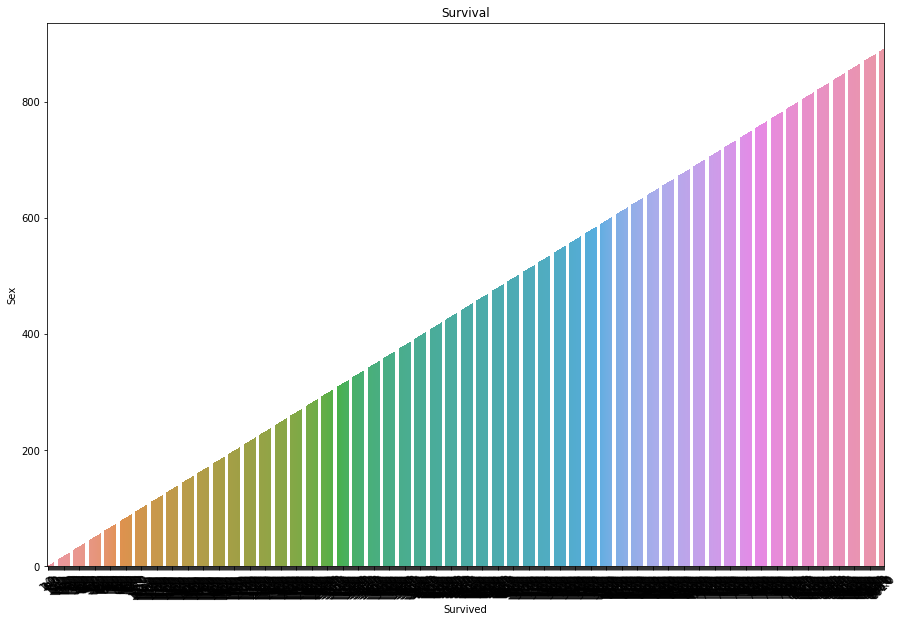

In [86]:
t.PassengerId.replace(['-'],0.0,inplace = True)
t.PassengerId = t.PassengerId.astype(float)
s_list = list(t['PassengerId'].unique())
s_ratio = []
for i in s_list:
    x = t[t['PassengerId']==i]
    s_rate = sum(x.PassengerId)/len(x)
    s_ratio.append(s_rate)
data = pd.DataFrame({'s_list': s_list,'s_ratio':s_ratio})
new_index = (data['s_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['s_list'], y=sorted_data['s_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.title("Survival")

In [91]:
sns.set()

Text(0.5,1,'2D plot')

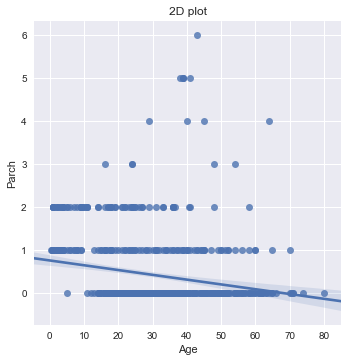

In [114]:
sns.lmplot(x='Age',y='Parch',data=t)
ax = plt.gca()
ax.set_title("2D plot")

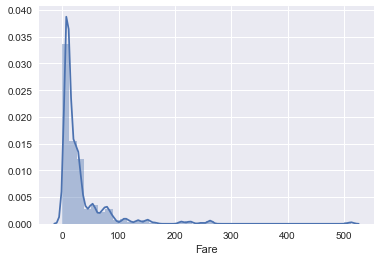

In [120]:
sns.distplot(t['Fare'],bins=40)

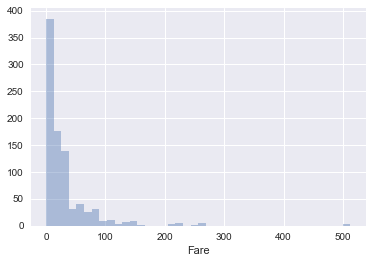

In [121]:
sns.distplot(t['Fare'],bins=40,kde=False)

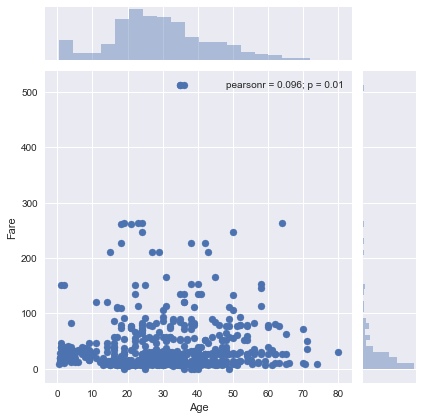

In [123]:
sns.jointplot(x='Age',y='Fare',data=t)

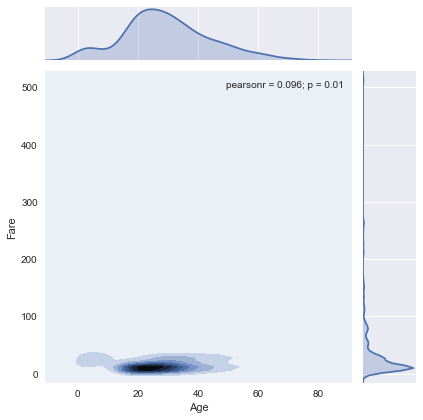

In [128]:
sns.jointplot(x='Age',y='Fare',data=t,kind='kde',dropna=True)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

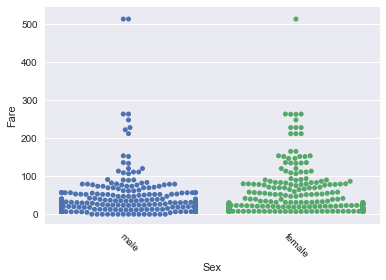

In [134]:
sns.swarmplot(x='Sex',y='Fare',data=t)
plt.xticks(rotation = -45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

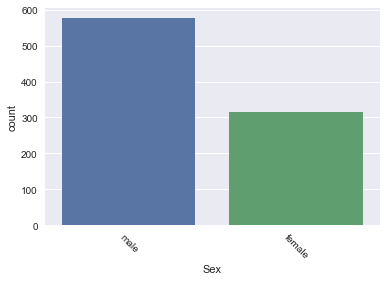

In [136]:
sns.countplot(x = 'Sex', data = t)
plt.xticks(rotation = -45)

In [ ]:
                                                        #THE END#